In [1]:
# Importing libraries.
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets # This module has many prebuild datasets.
import matplotlib.pyplot as plt

In [2]:
# Taking MNIST data.
train_dataset = dsets.MNIST(root='../resources/data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='../resources/data', train=False, download=True, transform=transforms.ToTensor())

In [3]:
# Custom class.
class Softmax(nn.Module):

    # Contructor.
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    
    # Predictor.
    def forward(self, x):
        out = self.linear(x)
        return out

In [4]:
# Create model object.
input_dim = 28*28
output_dim = 10
model = Softmax(input_dim, output_dim)

In [5]:
# Cost function and optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Lists to have record of model performance.
accuracy_list = []
loss_list = []

In [7]:
# Loading data.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [8]:
# Training.
for epoch in range(20):
    for x, y in train_loader:
        
        z = model(x.view(-1,28*28))
        loss = criterion(z, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation.
    correct = 0
    for x_val, y_val in validation_loader:

        z = model(x_val.view(-1, 28*28))
        _,yhat = z.max(1)
        correct += (yhat == y_val).sum().item()
    
    accuracy = correct/len(validation_dataset)
    accuracy_list.append(accuracy)
    loss_list.append(loss)


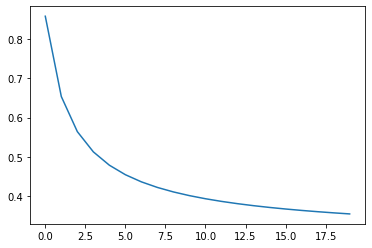

In [9]:
# Plotting cost curve.
plt.plot(range(20), loss_list)

In [10]:
# Checking accuracy after every epoch.
print(accuracy_list)

[0.854, 0.8747, 0.8833, 0.8881, 0.8916, 0.8947, 0.8977, 0.8998, 0.9015, 0.9034, 0.9043, 0.9054, 0.9071, 0.9081, 0.9088, 0.9089, 0.9099, 0.9105, 0.9107, 0.9115]
